In [1]:
import pandas as pd
import re

# Initialize a list to hold the complete lines (each representing a full list of skills)
complete_lines = []

# Initialize a variable to hold the current list being processed
current_list = ''

# Read the file and concatenate lines to form complete skill lists
with open('/home/eduardo/Documents/Persona3/AutoTelos/telos_1_attempt/predictionsOrignal.log', 'r') as f:
    for line in f:
        stripped_line = line.strip()

        # Skip lines containing 'optional skills found' or 'mandatory set found'
        if 'optional skills found' in stripped_line or 'mandatory set found' in stripped_line:
            continue

        if 'INFO:root:' in stripped_line:
            if current_list:
                complete_lines.append(current_list)
                current_list = ''
            current_list = stripped_line  # Start a new list
        else:
            current_list += ' ' + stripped_line  # Continuation of the current list

        if current_list.endswith(']'):
            complete_lines.append(current_list)
            current_list = ''

# Initialize a list to hold the parsed skills data
skills_data = []

# Process each complete line (full skill list) to extract skills
for line in complete_lines:
    skill_list_str = line.replace("INFO:root:", "").strip()[1:-1]

    # Regex pattern to include sequences within single or double quotes, or non-quoted words
    skills = re.findall(r"'([^']*)'|\"([^\"]*)\"|(\S+)", skill_list_str)

    # Flatten the tuples and filter out empty strings
    flattened_skills = [item for sublist in skills for item in sublist if item]

    skills_data.append(flattened_skills)

# Create a DataFrame with each skill in its own column
skills_df = pd.DataFrame(skills_data, columns=[f'Skill_{i+1}' for i in range(8)])

# Display the DataFrame to verify the results
print(skills_df.shape)
print(skills_df.head())


(41795, 8)
       Skill_1     Skill_2        Skill_3       Skill_4        Skill_5  \
0  Akasha Arts  Wind Boost   Poison Arrow      Mahamaon  Auto-Tarukaja   
1   Wind Boost  Evade Wind       Growth 3  High Counter   Morning Star   
2  Mind Charge  God's Hand     Wind Boost    Megidolaon       Mahamaon   
3     Megidola   Apt Pupil  Absorb Pierce      Growth 3   Stagnant Air   
4     Growth 2  Wind Boost     Evade Wind        Garula       Mahamaon   

        Skill_6        Skill_7        Skill_8  
0   Auto-Mataru   Spell Master   1hSwd Master  
1      Wind Amp  Tempest Slash  Auto-Sukukaja  
2      Growth 3   1hSwd Master   Invigorate 3  
3  High Counter     God's Hand     Evade Wind  
4  Ghastly Wail   Stagnant Air       Wind Amp  


In [2]:
# Iterate over the rows and check for repeated values
repeated_values = skills_df.apply(lambda row: row.nunique() < len(row), axis=1)

# Print the rows with repeated values
print(skills_df[repeated_values])

Empty DataFrame
Columns: [Skill_1, Skill_2, Skill_3, Skill_4, Skill_5, Skill_6, Skill_7, Skill_8]
Index: []


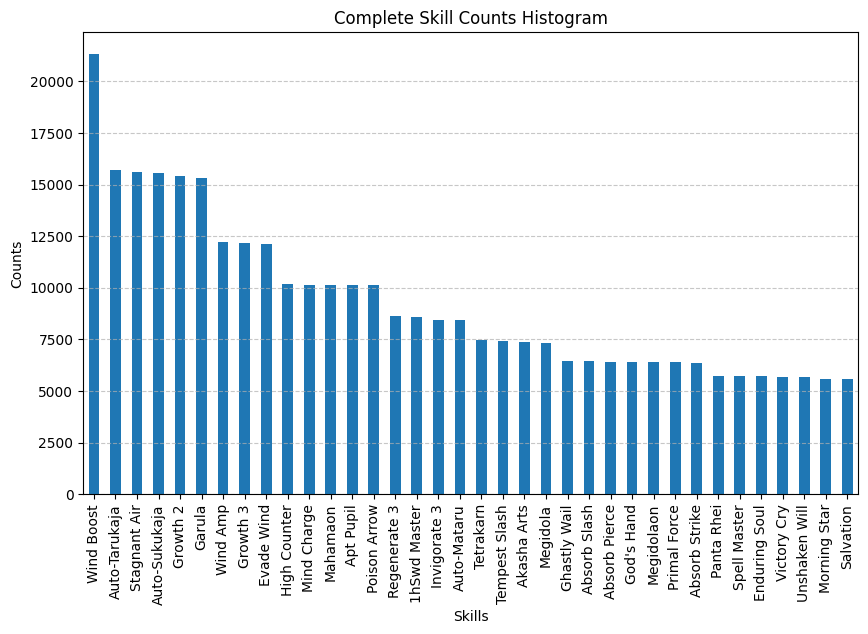

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming skills_df is already defined and loaded as per your previous code

# Flatten the DataFrame to get a list of all skills
all_skills = skills_df.values.flatten()

# Convert the list of all skills into a Series
skills_series = pd.Series(all_skills)

# Count the occurrences of each unique skill
skill_counts = skills_series.value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar')
plt.title('Complete Skill Counts Histogram')
plt.xlabel('Skills')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
print(type(skill_counts))
print(skill_counts)

<class 'pandas.core.series.Series'>
Wind Boost       21313
Auto-Tarukaja    15715
Stagnant Air     15596
Auto-Sukukaja    15563
Growth 2         15425
Garula           15328
Wind Amp         12204
Growth 3         12154
Evade Wind       12103
High Counter     10167
Mind Charge      10143
Mahamaon         10136
Apt Pupil        10133
Poison Arrow     10118
Regenerate 3      8625
1hSwd Master      8576
Invigorate 3      8455
Auto-Mataru       8428
Tetrakarn         7476
Tempest Slash     7434
Akasha Arts       7371
Megidola          7320
Ghastly Wail      6476
Absorb Slash      6434
Absorb Pierce     6420
God's Hand        6419
Megidolaon        6415
Primal Force      6411
Absorb Strike     6361
Panta Rhei        5721
Spell Master      5719
Enduring Soul     5712
Victory Cry       5660
Unshaken Will     5659
Morning Star      5601
Salvation         5569
dtype: int64


In [12]:
# Calculate total count
total_count_series = skill_counts.sum()

# Calculate the percentage of each skill
percentages_series = (skill_counts / total_count_series)

print(percentages_series)

Wind Boost       0.063743
Auto-Tarukaja    0.047000
Stagnant Air     0.046644
Auto-Sukukaja    0.046546
Growth 2         0.046133
Garula           0.045843
Wind Amp         0.036500
Growth 3         0.036350
Evade Wind       0.036198
High Counter     0.030407
Mind Charge      0.030336
Mahamaon         0.030315
Apt Pupil        0.030306
Poison Arrow     0.030261
Regenerate 3     0.025796
1hSwd Master     0.025649
Invigorate 3     0.025287
Auto-Mataru      0.025206
Tetrakarn        0.022359
Tempest Slash    0.022234
Akasha Arts      0.022045
Megidola         0.021893
Ghastly Wail     0.019368
Absorb Slash     0.019243
Absorb Pierce    0.019201
God's Hand       0.019198
Megidolaon       0.019186
Primal Force     0.019174
Absorb Strike    0.019024
Panta Rhei       0.017110
Spell Master     0.017104
Enduring Soul    0.017083
Victory Cry      0.016928
Unshaken Will    0.016925
Morning Star     0.016751
Salvation        0.016656
dtype: float64


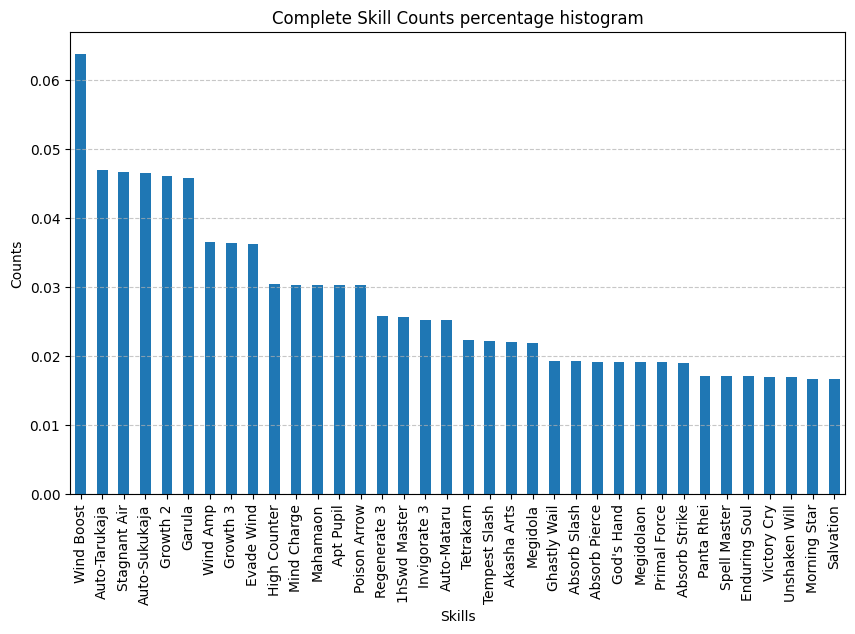

In [13]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
percentages_series.plot(kind='bar')
plt.title('Complete Skill Counts percentage histogram')
plt.xlabel('Skills')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

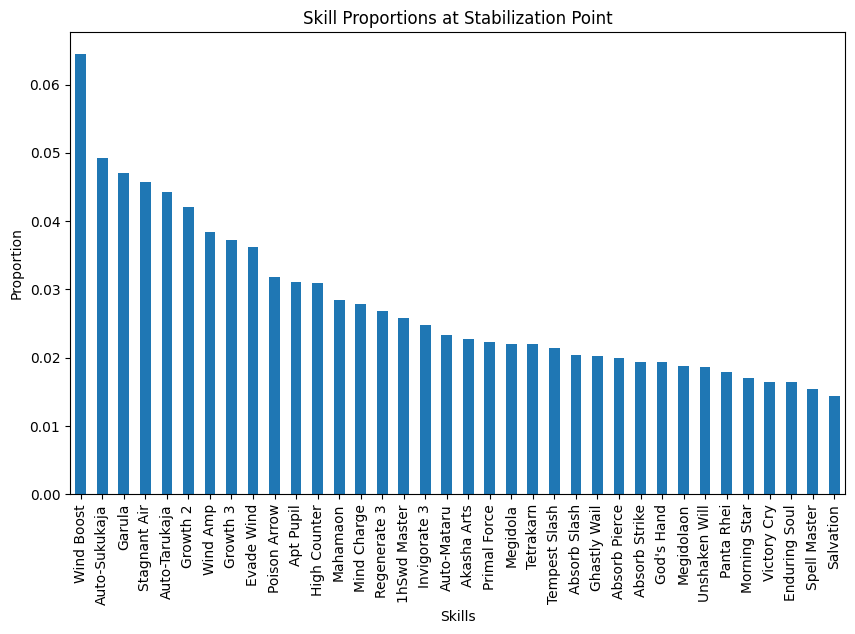

Stabilization Point: 7950


In [4]:
import pandas as pd
import numpy as np

def analyze_stabilization(df, step=100, threshold=0.01):
    """
    Analyze the stabilization of skill proportions in the DataFrame.

    :param df: DataFrame with skill occurrences.
    :param step: Number of rows to incrementally add for each subset analysis.
    :param threshold: Proportion change threshold to determine stabilization.
    :return: Stabilization point row index.
    """
    # Flatten the DataFrame to get a list of all skills
    all_skills = df.values.flatten()
    
    # Initialize variables
    last_proportions = None
    stabilization_point = None

    # Incrementally analyze the DataFrame
    for end in range(step, len(all_skills) + step, step):
        subset_skills = all_skills[:end]
        counts = pd.Series(subset_skills).value_counts()
        proportions = counts / counts.sum()
        
        # Skip the first iteration since there's no previous data to compare
        if last_proportions is not None:
            # Calculate the maximum proportion change for any skill
            proportion_changes = np.abs(proportions - last_proportions).fillna(0)
            max_change = proportion_changes.max()

            # Check if the maximum change is below the threshold
            if max_change < threshold:
                stabilization_point = end - step  # Use the previous end point as the stabilization point
                break
        
        last_proportions = proportions

    # Plotting the final proportions for visualization
    proportions.plot(kind='bar', figsize=(10, 6))
    plt.title('Skill Proportions at Stabilization Point')
    plt.xlabel('Skills')
    plt.ylabel('Proportion')
    plt.xticks(rotation=90)
    plt.show()

    return stabilization_point

# Flatten the DataFrame to create a single list of skills
skills_list = skills_df.values.flatten()

# Call the function to analyze stabilization
stabilization_point = analyze_stabilization(skills_df, step=10, threshold=0.0001)
print(f'Stabilization Point: {stabilization_point}')

In [5]:
import pandas as pd


df = pd.read_csv("/home/eduardo/Documents/Persona3/AutoTelos/skills_list/skills.csv")


skill_type_dict = df.set_index('skill')['type'].to_dict()

skill_rank_dict = df.set_index('skill')['rank'].to_dict()

# given a skill name return the skill type
def get_skill_type(skill_name):
    return skill_type_dict[skill_name]

def get_skill_rank(skill_name):
    return skill_rank_dict[skill_name]

# load '/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/inheritance.csv' into a dataframe
inheritance_df = pd.read_csv('/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/inheritance.csv')
# load '/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/personas_inheritance.csv' into a dataframe
persona_inheritance_df = pd.read_csv('/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/personas_inheritance.csv')

def get_persona_inheritance_type(persona_name):
    return persona_inheritance_df.loc[persona_inheritance_df['Persona'] == persona_name, 'Type'].iloc[0]



# Convert the DataFrame to a dictionary where each key is an inheritance type
# and its value is another dictionary of skill types and their probabilities.
inheritance_dict = inheritance_df.set_index('Inheritance Type').T.to_dict('dict')



# given a skill type return the skill inheritance probability for a given persona type
def get_inheritance_probability(skill_type, persona_inheritance_type):
    # Access the nested dictionary directly for the value
    # Check if the persona_inheritance_type exists to avoid KeyErrors
    if persona_inheritance_type in inheritance_dict:
        # Return the probability value for the given skill_type and persona_inheritance_type
        return inheritance_dict[persona_inheritance_type].get(skill_type, 0)  # Returns 0 if skill_type is not found

In [6]:
skill_counts_list = list(skill_counts.to_dict().keys())

ranks = []

dict_skill_to_rank = {}

for s in skill_counts_list:
    print(s, get_inheritance_probability(get_skill_type(s), get_persona_inheritance_type('orpheus telos')), get_skill_rank(s))
    ranks.append(get_skill_rank(s))
    dict_skill_to_rank[s] = get_skill_rank(s)

ranks = list(set(ranks))

print(ranks)

print(dict_skill_to_rank)




Wind Boost 1.0 2
Auto-Tarukaja 1.0 3
Stagnant Air 1.0 3
Auto-Sukukaja 1.0 3
Growth 2 1.0 3
Garula 1.0 3
Wind Amp 1.0 4
Growth 3 1.0 4
Evade Wind 1.0 4
High Counter 1.0 5
Mind Charge 1.0 5
Mahamaon 1.0 5
Apt Pupil 1.0 5
Poison Arrow 1.0 5
Regenerate 3 1.0 6
1hSwd Master 1.0 6
Invigorate 3 1.0 6
Auto-Mataru 1.0 6
Tetrakarn 1.0 7
Tempest Slash 1.0 7
Akasha Arts 1.0 7
Megidola 1.0 7
Ghastly Wail 1.0 8
Absorb Slash 1.0 8
Absorb Pierce 1.0 8
God's Hand 1.0 8
Megidolaon 1.0 8
Primal Force 1.0 8
Absorb Strike 1.0 8
Panta Rhei 1.0 9
Spell Master 1.0 9
Enduring Soul 1.0 9
Victory Cry 1.0 9
Unshaken Will 1.0 9
Morning Star 1.0 9
Salvation 1.0 9
[2, 3, 4, 5, 6, 7, 8, 9]
{'Wind Boost': 2, 'Auto-Tarukaja': 3, 'Stagnant Air': 3, 'Auto-Sukukaja': 3, 'Growth 2': 3, 'Garula': 3, 'Wind Amp': 4, 'Growth 3': 4, 'Evade Wind': 4, 'High Counter': 5, 'Mind Charge': 5, 'Mahamaon': 5, 'Apt Pupil': 5, 'Poison Arrow': 5, 'Regenerate 3': 6, '1hSwd Master': 6, 'Invigorate 3': 6, 'Auto-Mataru': 6, 'Tetrakarn': 7, 'Te

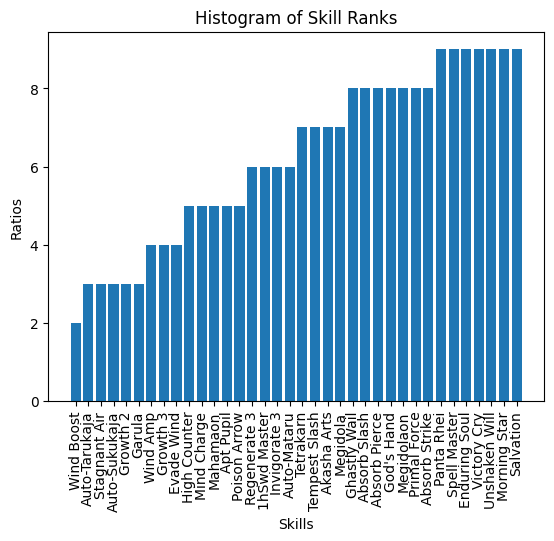

In [7]:
# Create lists of keys and values
skills = list(dict_skill_to_rank.keys())
ranks = list(dict_skill_to_rank.values())

# make a dictionary of skill as key and rank as value
dict_skill_to_rank = dict(zip(skills, ranks))


# Create the histogram
plt.bar(skills, ranks)

# Add labels and title
plt.xlabel('Skills')
plt.ylabel('Ratios')
plt.title('Histogram of Skill Ranks')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [8]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon

#print(skills_df)

# Step 1: Map skills to ranks
for col in skills_df.columns:
    skills_df[col] = skills_df[col].map(dict_skill_to_rank)

#print(skills_df)

print(skills_df)


# Initialize the cumulative distribution
cumulative_distribution = np.zeros(len(dict_skill_to_rank))
stabilization_point = None

# Threshold for stabilization, this is a parameter you might want to tweak
threshold = 0.001

# Iterate over each row in the DataFrame
for i, row in skills_df.iterrows():
    # Update the cumulative distribution with the current row
    ranks, counts = np.unique(row, return_counts=True)
    cumulative_distribution[ranks.astype(int) - 1] += counts

    # Normalize the cumulative distribution to get the current distribution
    current_distribution = cumulative_distribution / cumulative_distribution.sum()
    
    # Calculate the difference from the previous step using Jensen-Shannon divergence
    if i > 0:  # Skip the first row, as we have nothing to compare it to yet
        difference = jensenshannon(previous_distribution, current_distribution)

        # Check if the difference is below our threshold
        if difference < threshold:
            stabilization_point = i
            break
    
    # Store the current distribution for comparison in the next iteration
    previous_distribution = current_distribution

print(f"Stabilization occurred at row: {stabilization_point}")


       Skill_1  Skill_2  Skill_3  Skill_4  Skill_5  Skill_6  Skill_7  Skill_8
0            7        2        5        5        3        6        9        6
1            2        4        4        5        9        4        7        3
2            5        8        2        8        5        4        6        6
3            7        5        8        4        3        5        8        4
4            3        2        4        3        5        8        3        4
...        ...      ...      ...      ...      ...      ...      ...      ...
41790        9        2        8        4        8        5        8        7
41791        9        7        8        3        7        8        3        4
41792        3        2        3        8        9        5        5        3
41793        5        4        3        6        9        3        6        5
41794        6        9        8        5        3        3        3        8

[41795 rows x 8 columns]
Stabilization occurred at row: 146
